In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

C:\Users\Himanshu Pc\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict
C:\Users\Himanshu Pc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Himanshu Pc\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [2]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

In [3]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [4]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [5]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [6]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [7]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.0,0.0,0.999950002499875,0.333327777870369,0.399992000159997,0.0909086776878287,0.0,0.0,17.0,13.5,...,None,None,None,None,None,None,None,None,None,None
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,17.5,...,None,None,None,None,None,None,None,None,None,None
3,0.499991666805553,0.499991666805553,0.33332222259258,0.111109876556927,0.444439506227709,0.235292733572155,0.0,0.0,8.0,13.0,...,None,None,None,None,None,None,None,None,None,None
4,0.799984000319994,0.571420408279882,0.999980000399992,0.714275510349852,0.818174380232907,0.599996000026667,0.0,1.0,4.0,13.0,...,None,None,None,None,None,None,None,None,None,None
5,0.66664444518516,0.249996875039062,0.0,0.0,0.333327777870369,0.153844970423304,0.0,0.0,7.0,9.5,...,None,None,None,None,None,None,None,None,None,None


<h2> 4.2 Converting strings to numerics </h2>

In [8]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric, errors='coerce')
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [11]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Perform hyperparameter tuning  of XgBoost models using RandomsearchCV with vectorizer as TF-IDF W2V  to reduce the log-loss.



In [13]:
df = pd.read_csv("train.csv")
print("Number of data points:",df.shape[0])

Number of data points: 404290


In [14]:
df_org = df.drop(['qid1', 'qid2'],axis = 1)
df_org.head()

,id,question1,question2,is_duplicate
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [15]:
dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
df1 = dfnlp.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

In [16]:
df1.head()

,id,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [17]:
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

In [18]:
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [19]:
df3 = dfnlp[['id','question1','question2']]

In [20]:
df3.head()

,id,question1,question2
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...
2,2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,3,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...
4,4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water


In [21]:
df3 = df3.fillna(' ')

In [22]:
#Creating a seperate dataframe for combined quesitons
df_q = pd.DataFrame()
df_q['que_comb'] = df3.question1 + ' ' + df3.question2
df_q['id'] = df3.id

In [23]:
df_q.head()

,que_comb,id
0,what is the step by step guide to invest in sh...,0
1,what is the story of kohinoor koh i noor dia...,1
2,how can i increase the speed of my internet co...,2
3,why am i mentally very lonely how can i solve...,3
4,which one dissolve in water quikly sugar salt...,4


In [24]:
# Merging above dataframes to create a single one
temp1 = df1.merge(df2, on='id', how='left')
final_df = temp1.merge(df_q, on='id', how='left')

In [25]:
#Removing ID from final_df 
final_df = final_df.drop('id', axis=1)
final_df.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,que_comb
0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,...,66,57,14,12,10.0,23.0,0.434783,2,0,what is the step by step guide to invest in sh...
1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,...,51,88,8,13,4.0,20.0,0.200000,5,3,what is the story of kohinoor koh i noor dia...
2,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,...,73,59,14,10,4.0,24.0,0.166667,2,0,how can i increase the speed of my internet co...
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,...,50,65,11,9,0.0,19.0,0.000000,2,0,why am i mentally very lonely how can i solve...
4,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,...,76,39,13,7,2.0,20.0,0.100000,4,2,which one dissolve in water quikly sugar salt...


In [26]:
output = dfnlp.is_duplicate

In [27]:
y = np.array(output)

In [28]:
X_train_0,X_test_0, y_train, y_test = train_test_split(final_df, y, stratify=y, test_size=0.3)

In [30]:
print(X_train_0.shape)
print(y_train.shape)
print(X_test_0.shape)
print(y_test.shape)

(283003, 27)
(283003,)
(121287, 27)
(121287,)


In [32]:
xtr_q = X_train_0['que_comb']
xte_q = X_test_0['que_comb']

In [33]:
xtr_q.shape

(283003,)

In [35]:
# Dropping questions column from Final Dataframe
X_train = X_train_0.drop('que_comb', axis=1)
X_test = X_test_0.drop('que_comb', axis=1)

In [36]:
X_train.shape

(283003, 26)

In [37]:
# Vectorizing Questions text using TFIDF vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
# Performing fit_transform on training data
tfidf_xtr = tfidf_vec.fit_transform(xtr_q)
#Performing transformation on test data 
tfidf_xte = tfidf_vec.transform(xte_q)

In [38]:
tfidf_xtr.shape

(283003, 73469)

#### Horizontal Stacking TFIDF Vectorized questions & Rest of the DataFrame

In [39]:
Xtr_final = hstack((X_train, tfidf_xtr)).tocsr()
Xte_final = hstack((X_test, tfidf_xte)).tocsr()

#### Distribution of Output Variable

In [40]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6308025003268517 Class 1:  0.36919749967314835
---------- Distribution of output variable in train data ----------
Class 0:  0.3691986775169639 Class 1:  0.3691986775169639


<h2>  Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.44380744105532843
For values of alpha =  0.0001 The log loss is: 0.4431549147824578
For values of alpha =  0.001 The log loss is: 0.4408391174306685
For values of alpha =  0.01 The log loss is: 0.4447369218506525
For values of alpha =  0.1 The log loss is: 0.4605200500128207
For values of alpha =  1 The log loss is: 0.4927860381192265
For values of alpha =  10 The log loss is: 0.5453991068354689


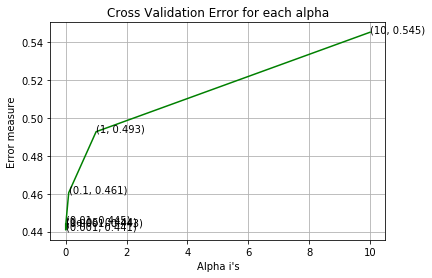

For values of best alpha =  0.001 The train log loss is: 0.44063153181937054
For values of best alpha =  0.001 The test log loss is: 0.4408391174306685
Total number of data points : 121287


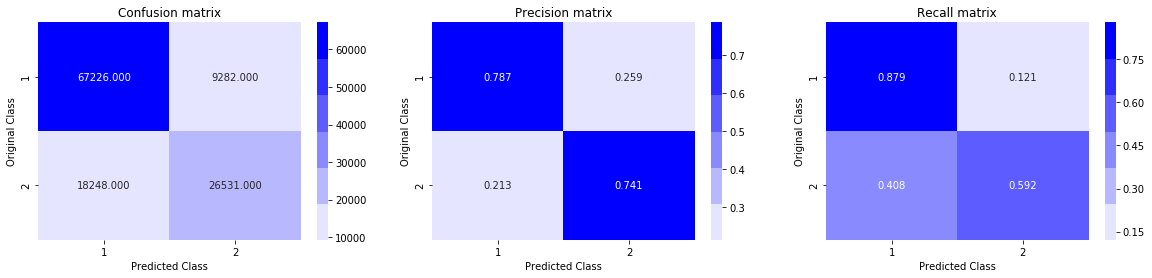

In [41]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(Xtr_final, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(Xtr_final, y_train)
    predict_y = sig_clf.predict_proba(Xte_final)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(Xtr_final, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(Xtr_final, y_train)

predict_y = sig_clf.predict_proba(Xtr_final)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(Xte_final)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.4467370620193715
For values of alpha =  0.0001 The log loss is: 0.479097639204281
For values of alpha =  0.001 The log loss is: 0.5013286698132974
For values of alpha =  0.01 The log loss is: 0.521584008102951
For values of alpha =  0.1 The log loss is: 0.5054396303478068
For values of alpha =  1 The log loss is: 0.5897393661508007
For values of alpha =  10 The log loss is: 0.6398893732086115


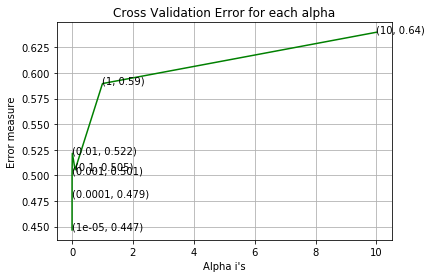

For values of best alpha =  1e-05 The train log loss is: 0.4451364751017019
For values of best alpha =  1e-05 The test log loss is: 0.4467370620193715
Total number of data points : 121287


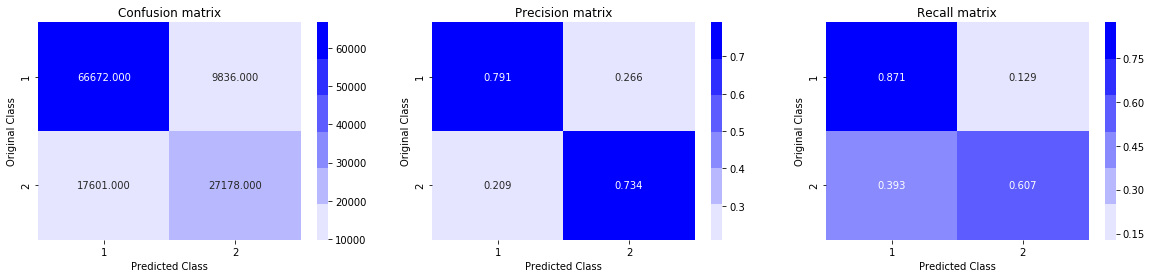

In [42]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(Xtr_final, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(Xtr_final, y_train)
    predict_y = sig_clf.predict_proba(Xte_final)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(Xtr_final, y_train)

predict_y = sig_clf.predict_proba(Xtr_final)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(Xte_final)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [43]:
# avoid decoding problems
df = pd.read_csv("train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [47]:
import en_core_web_sm
from tqdm import tqdm
# en_vectors_web_lg, which includes over 1 million unique vectors.
#nlp = spacy.load('en_core_web_sm')
nlp = en_core_web_sm.load()

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(xtr_q)):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
#df['q1_feats_m'] = list(vecs1)

100%|█████████████████████████████████████████████████████████████████████████| 283003/283003 [43:13<00:00, 109.13it/s]


In [48]:
vecs2 = []
for qu2 in tqdm(list(xte_q)):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc1), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
#df['q2_feats_m'] = list(vecs2)

100%|█████████████████████████████████████████████████████████████████████████| 121287/121287 [16:51<00:00, 119.85it/s]


In [49]:
vec1_df = pd.DataFrame(vecs1)

In [50]:
vec2_df = pd.DataFrame(vecs2)

In [51]:
# Merging above dataframes to create a single one
X_train_new = hstack((X_train, vec1_df))
X_test_new = hstack((X_test, vec2_df))

In [52]:
print(X_train_new.shape)
print(X_test_new.shape)

(283003, 122)
(121287, 122)


### ML Models

In [53]:
print("Number of data points in train data :",X_train_new.shape)
print("Number of data points in test data :",X_test_new.shape)

Number of data points in train data : (283003, 122)
Number of data points in test data : (121287, 122)


In [54]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6308025003268517 Class 1:  0.36919749967314835
---------- Distribution of output variable in train data ----------
Class 0:  0.3691986775169639 Class 1:  0.3691986775169639


<h2>  Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.5089775139867
For values of alpha =  0.0001 The log loss is: 0.5094027775187229
For values of alpha =  0.001 The log loss is: 0.5129474634898982
For values of alpha =  0.01 The log loss is: 0.5044374552730008
For values of alpha =  0.1 The log loss is: 0.5079338329956425
For values of alpha =  1 The log loss is: 0.49522051626423524
For values of alpha =  10 The log loss is: 0.5353383227588032


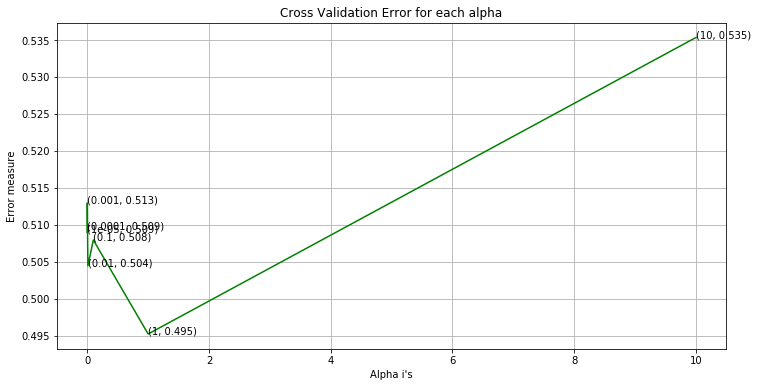

For values of best alpha =  1 The train log loss is: 0.4960462745490079
For values of best alpha =  1 The test log loss is: 0.49522051626423524
Total number of data points : 121287


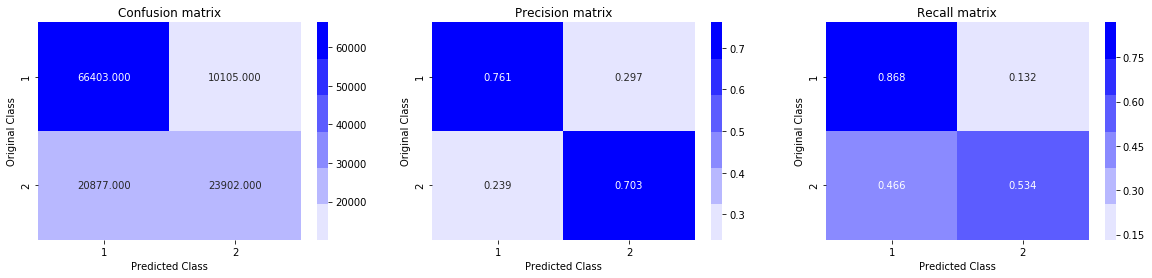

In [79]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train_new, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_new, y_train)
    predict_y = sig_clf.predict_proba(X_test_new)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_new, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_new, y_train)

predict_y = sig_clf.predict_proba(X_train_new)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_new)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.4752638171762168
For values of alpha =  0.0001 The log loss is: 0.4769996113719042
For values of alpha =  0.001 The log loss is: 0.4787607432742648
For values of alpha =  0.01 The log loss is: 0.5026396122791549
For values of alpha =  0.1 The log loss is: 0.5988495104299245
For values of alpha =  1 The log loss is: 0.6455280259253946
For values of alpha =  10 The log loss is: 0.6585278256347588


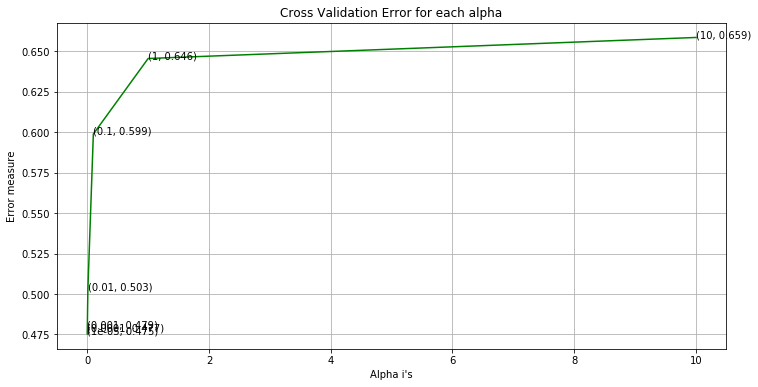

For values of best alpha =  1e-05 The train log loss is: 0.47547107426594376
For values of best alpha =  1e-05 The test log loss is: 0.4752638171762168
Total number of data points : 121287


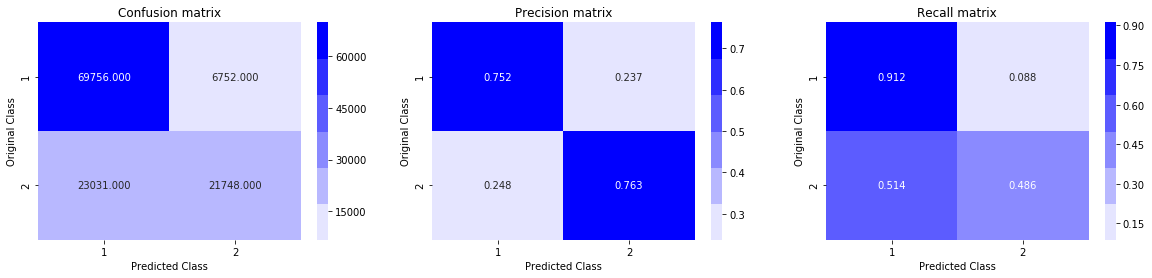

In [80]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train_new, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_new, y_train)
    predict_y = sig_clf.predict_proba(X_test_new)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train_new, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_new, y_train)

predict_y = sig_clf.predict_proba(X_train_new)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_new)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### XGBOOST With Pre-Defined parameters

In [58]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train_new, label=y_train)
d_test = xgb.DMatrix(X_test_new, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train_new,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.684241	valid-logloss:0.684624
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.615983	valid-logloss:0.615271
[20]	train-logloss:0.564753	valid-logloss:0.564284
[30]	train-logloss:0.526766	valid-logloss:0.526618
[40]	train-logloss:0.497539	valid-logloss:0.496957
[50]	train-logloss:0.47474	valid-logloss:0.473962
[60]	train-logloss:0.456279	valid-logloss:0.455498
[70]	train-logloss:0.441682	valid-logloss:0.440895
[80]	train-logloss:0.429898	valid-logloss:0.429059
[90]	train-logloss:0.4201	valid-logloss:0.419481
[100]	train-logloss:0.4122	valid-logloss:0.411476
[110]	train-logloss:0.40539	valid-logloss:0.404786
[120]	train-logloss:0.399832	valid-logloss:0.399077
[130]	train-logloss:0.395047	valid-logloss:0.394273
[140]	train-logloss:0.391038	valid-logloss:0.390265
[150]	train-logloss:0.387585	valid-logloss:0.386938
[160]	train-logloss:0.384585	valid

### HyperParameter Tuning for XGBoost

In [61]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"max_depth":[1, 3, 5, 7, 10],
              "n_estimators":[10, 100, 200, 400, 500]}

model = RandomizedSearchCV(xgb.XGBClassifier(n_jobs=-1,random_state=25), param_distributions=param_grid,n_iter=10,scoring='neg_log_loss',cv=3,n_jobs=-1)

model.fit(X_train_new,y_train)
model.best_params_

{'n_estimators': 500, 'max_depth': 7}

In [66]:
train_auc = model.cv_results_['mean_train_score']
train_auc_std = model.cv_results_['std_train_score']
cv_auc = model.cv_results_['mean_test_score']
cv_auc_std = model.cv_results_['std_test_score']

In [67]:
#Results of grid Search
best_params = model.best_params_
print(model.best_score_)
print(model.best_params_)

-0.3185089213716682
{'n_estimators': 500, 'max_depth': 7}


In [68]:
model.cv_results_

{'mean_fit_time': array([ 582.33066948,  232.75754762,  222.25767056,  122.32207982,
         453.61260486, 1434.77335143,  359.09715811,   81.86544188,
        1385.56350152,  322.02114169]),
 'std_fit_time': array([ 0.97071202, 13.54491753,  0.21176771, 15.67139178, 16.74628786,
        50.07692449,  6.91725448,  4.09714374, 23.64014588,  4.59671697]),
 'mean_score_time': array([5.00361911, 4.73234479, 5.10900315, 4.75496952, 5.01894506,
        6.0901231 , 5.56734856, 4.43281245, 4.47071099, 4.72315733]),
 'std_score_time': array([0.10135539, 0.12901037, 0.09108134, 0.39761445, 0.16225989,
        0.68057173, 0.82141065, 0.31320569, 0.47712239, 0.13629716]),
 'param_n_estimators': masked_array(data=[500, 200, 100, 100, 400, 400, 200, 200, 500, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 3, 5, 3, 3, 7, 5, 1, 7, 7],
    

In [69]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-b
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visu
#https://qiita.com/bmj0114/items/8009f282c99b77780563
#Saving the obtained results from gridsearch in two dimensional array as dataframe
results = pd.DataFrame(model.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,582.330669,0.970712,5.003619,0.101355,500,3,"{'n_estimators': 500, 'max_depth': 3}",-0.333904,-0.336233,-0.334673,-0.334936,0.000969,5,-0.322424,-0.322142,-0.322670,-0.322412,0.000216
1,232.757548,13.544918,4.732345,0.129010,200,3,"{'n_estimators': 200, 'max_depth': 3}",-0.345848,-0.348180,-0.346611,-0.346880,0.000971,8,-0.342400,-0.341937,-0.342492,-0.342277,0.000243
2,222.257671,0.211768,5.109003,0.091081,100,5,"{'n_estimators': 100, 'max_depth': 5}",-0.341078,-0.343182,-0.341711,-0.341990,0.000881,7,-0.332880,-0.332209,-0.332074,-0.332388,0.000352
3,122.322080,15.671392,4.754970,0.397614,100,3,"{'n_estimators': 100, 'max_depth': 3}",-0.361833,-0.363683,-0.362059,-0.362525,0.000824,9,-0.361234,-0.359758,-0.360308,-0.360433,0.000609
4,453.612605,16.746288,5.018945,0.162260,400,3,"{'n_estimators': 400, 'max_depth': 3}",-0.336296,-0.338672,-0.336731,-0.337233,0.001033,6,-0.327519,-0.327196,-0.327367,-0.327361,0.000132


In [73]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
best_scores = results.groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
print(best_scores)

                   mean_test_score                                \
param_max_depth                  1         3         5         7   
param_n_estimators                                                 
100                            NaN -0.362525 -0.341990 -0.331901   
200                      -0.400774 -0.346880 -0.331959       NaN   
400                            NaN -0.337233       NaN -0.319563   
500                            NaN -0.334936       NaN -0.318509   

                   mean_train_score                                
param_max_depth                   1         3         5         7  
param_n_estimators                                                 
100                             NaN -0.360433 -0.332388 -0.301097  
200                       -0.400383 -0.342277 -0.310742       NaN  
400                             NaN -0.327361       NaN -0.208685  
500                             NaN -0.322412       NaN -0.186748  


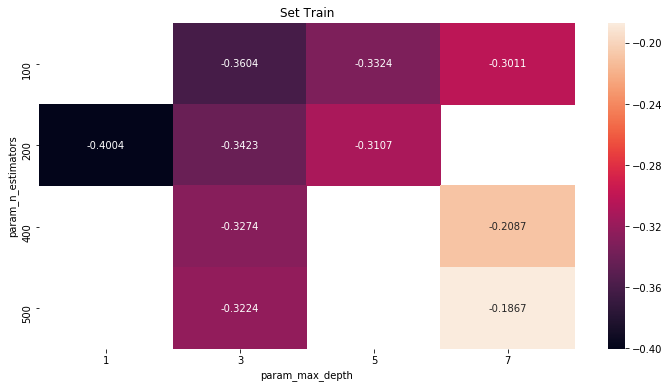

In [75]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
title = 'Set Train'
fmt = 'png'
sns.heatmap(best_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

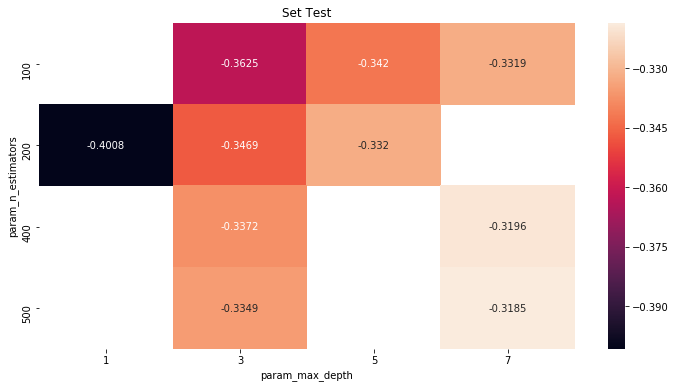

In [76]:
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
title = 'Set Test'
fmt = 'png'
sns.heatmap(best_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

Train log loss =  0.31572836093007695  Test log loss =  0.3292498334421974


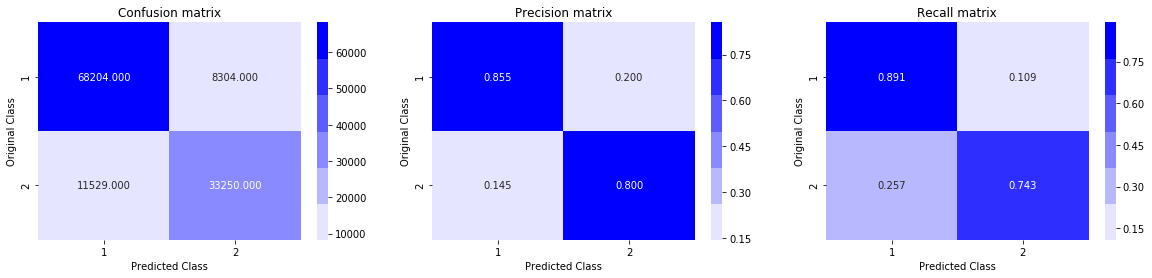

In [77]:
clf=xgb.XGBClassifier(n_jobs=-1,random_state=25,max_depth=5,n_estimators=200)
clf.fit(X_train_new, y_train)
y_pred_test=clf.predict_proba(X_test_new)
y_pred_train=clf.predict_proba(X_train_new)
log_loss_train = log_loss(y_train, y_pred_train, eps=1e-15)
log_loss_test=log_loss(y_test,y_pred_test,eps=1e-15)
print('Train log loss = ',log_loss_train,' Test log loss = ',log_loss_test)
predicted_y=np.argmax(y_pred_test,axis=1)
plot_confusion_matrix(y_test,predicted_y)

In [81]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["Sr.No", "Model","vectorizer","Training log loss", "Test Log Loss"]
x.add_row(['1', 'Logistic regression','TFIDF W2V','0.496', '0.495'])
x.add_row(['2', 'Linear SVM','TFIDF W2V','0.475', '0.475'])
x.add_row(['3', 'Logistic regression','TFIDF','0.440', '0.440'])
x.add_row(['4', 'Linear SVM','TFIDF','0.445', '0.446'])
x.add_row(['5', 'XGBOOST(with Pre-defined Parameters)','TFIDF W2V','0.353', '0.354'])
x.add_row(['6', 'XGBOOST(with Hyperparameter Tuning)','TFIDF W2V','0.315', '0.329'])
print(x)

+-------+--------------------------------------+------------+-------------------+---------------+
| Sr.No |                Model                 | vectorizer | Training log loss | Test Log Loss |
+-------+--------------------------------------+------------+-------------------+---------------+
|   1   |         Logistic regression          | TFIDF W2V  |       0.496       |     0.495     |
|   2   |              Linear SVM              | TFIDF W2V  |       0.475       |     0.475     |
|   3   |         Logistic regression          |   TFIDF    |       0.440       |     0.440     |
|   4   |              Linear SVM              |   TFIDF    |       0.445       |     0.446     |
|   5   | XGBOOST(with Pre-defined Parameters) | TFIDF W2V  |       0.353       |     0.354     |
|   6   | XGBOOST(with Hyperparameter Tuning)  | TFIDF W2V  |       0.315       |     0.329     |
+-------+--------------------------------------+------------+-------------------+---------------+


### Observations :- 

1. We observe that amongst linear models Logistic Regression is giving us  the least log-loss.


2. Combining Logistic Regression with TFIDF w2v we get the highest log loss of 0.496 but with TFIDF vectorizer we get a score of 0.440.


3. So we notice that the log loss is less when we use the same model with TFIDF vectorizer instead of TFIDF W2V Vectorizer.


4. But if we take all the models into consideration, XGBoost gives us the best result with a log loss of 0.329.